In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

import seaborn as sns
from pandas_profiling import ProfileReport

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# !ls

In [0]:
from google.colab import drive


In [4]:
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
meat_df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/net-meat-production-in-nepal-by-district-.csv')
egg_df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/production-of-egg-in-nepal-by-district.csv')

In [0]:
# meat_df.head(50)

## Data Preparation

For task: Cluster 75 districts by meat and egg production

In [0]:
geog_df=meat_df[meat_df['DISTRICT'].isin(['E.REGION','C.REGION','W.REGION','MW.REGION','FW.REGION'])]

# df=geog_df.transpose()
# sns.heatmap(df.corr())
# sns.heatmap(geog_df.corr())
cent_df=meat_df[meat_df['DISTRICT'].isin(['C.MOUNTAIN','C.HILLS','C.TERAI'])]

In [54]:
geog_df.columns

Index(['DISTRICT', 'BUFF', 'MUTTON', 'CHEVON', 'PORK ', 'CHICKEN', 'DUCK MEAT',
       'TOTAL MEAT'],
      dtype='object')

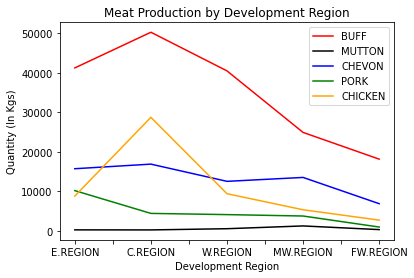

In [62]:
# gca stands for 'get current axis'
ax = plt.gca()

geog_df.plot(kind='line',x='DISTRICT',y='BUFF',color='red',ax=ax)
geog_df.plot(kind='line',x='DISTRICT',y='MUTTON',color='black',ax=ax)
geog_df.plot(kind='line',x='DISTRICT',y='CHEVON',color='blue',ax=ax)
geog_df.plot(kind='line',x='DISTRICT',y='PORK ',color='green',ax=ax)
geog_df.plot(kind='line',x='DISTRICT',y='CHICKEN',color='orange',ax=ax)
plt.title('Meat Production by Development Region')
plt.xlabel('Development Region')
plt.ylabel('Quantity (In Kgs)')
plt.show()


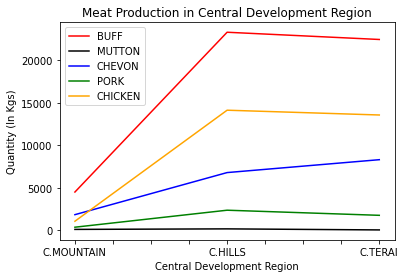

In [57]:
ax = plt.gca()

cent_df.plot(kind='line',x='DISTRICT',y='BUFF',color='red',ax=ax)
cent_df.plot(kind='line',x='DISTRICT',y='MUTTON',color='black',ax=ax)
cent_df.plot(kind='line',x='DISTRICT',y='CHEVON',color='blue',ax=ax)
cent_df.plot(kind='line',x='DISTRICT',y='PORK ',color='green',ax=ax)
cent_df.plot(kind='line',x='DISTRICT',y='CHICKEN',color='orange',ax=ax)
plt.title('Meat Production in Central Development Region')
plt.xlabel('Central Development Region')
plt.ylabel('Quantity (In Kgs)')
plt.show()

In [0]:
# geog_df=meat_df.loc[meat_df['DISTRICT']=='E.REGION','C.REGION','W.REGION','MW.REGION','W.REGION']

In [0]:
# geog_df=meat_df[['E.MOUNTAIN','E.HILLS','E.TERAI','C.MOUNTAIN','C.HILLS','C.TERAI','W.MOUNTAIN','W.HILLS','W.TERAI'
# 'FW.TERAI','FW.HILLS','FW.MOUNTAIN','MW.TERAI','MW.HILLS','MW.MOUNTAIN']]

In [0]:
drop_list=['MOUNTAIN','HILLS','TERAI','REGION','NEPAL']

def remove_nondistrict(df,drop_list):
    mdf=df[~df['DISTRICT'].map(lambda x: any([l in x for l in drop_list]))]
    return mdf

mdf=remove_nondistrict(meat_df,drop_list)
edf=remove_nondistrict(egg_df,drop_list)


In [0]:
# meat_profile = ProfileReport(mdf, title='Pandas Profiling Report', html={'style':{'full_width':True}})
# egg_profile =  ProfileReport(edf, title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [15]:
edf

,DISTRICT,LAYING HEN,LAYING DUCK,HEN EGG,DUCK EGG,TOTAL EGG
0,TAPLEJUNG,15366.0,341,2420,25,2445
1,SANKHUWASHAVA,77512.0,465,5506,34,5540
2,SOLUKHUMBU,42671.0,374,2345,28,2373
4,PANCHTHAR,63779.0,261,5581,19,5600
5,ILLAM,26781.0,332,6656,27,6683
...,...,...,...,...,...,...
87,DOTI,22999.0,80,3622,7,3629
88,BAITADI,3509.0,107,594,6,600
89,DADELDHURA,10131.0,205,1596,17,1613
91,KAILALI,277409.3,3418,16928,275,17203


In [49]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 0 to 92
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DISTRICT    75 non-null     object
 1   BUFF        75 non-null     int64 
 2   MUTTON      75 non-null     int64 
 3   CHEVON      75 non-null     int64 
 4   PORK        75 non-null     int64 
 5   CHICKEN     75 non-null     int64 
 6   DUCK MEAT   75 non-null     int64 
 7   TOTAL MEAT  75 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 5.3+ KB


In [17]:
pd.merge(mdf,edf,on='DISTRICT',how='inner').shape

(74, 13)

In [18]:
set(mdf['DISTRICT'].unique()).difference(edf['DISTRICT'].unique())

{'SANKHUWASABHA'}

In [19]:
set(edf['DISTRICT'].unique()).difference(mdf['DISTRICT'].unique())

{'SANKHUWASHAVA'}

In [20]:
mdf

,DISTRICT,BUFF,MUTTON,CHEVON,PORK,CHICKEN,DUCK MEAT,TOTAL MEAT
0,TAPLEJUNG,607,31,491,443,172,0,1744
1,SANKHUWASABHA,1646,41,958,509,302,1,3457
2,SOLUKHUMBU,1123,28,416,428,166,0,2161
4,PANCHTHAR,1496,4,940,730,248,1,3419
5,ILLAM,1974,1,870,416,104,0,3365
...,...,...,...,...,...,...,...,...
87,DOTI,1625,2,840,40,106,0,2613
88,BAITADI,1727,1,730,12,14,0,2484
89,DADELDHURA,1011,1,823,29,70,0,1934
91,KAILALI,5962,71,1480,469,1303,4,9289


In [21]:
mdf['DISTRICT']=mdf['DISTRICT'].map(lambda x: 'SANKHUWASHAVA' if x=='SANKHUWASABHA' else x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
me_df=pd.merge(mdf,edf,on='DISTRICT',how='inner')

In [46]:
me_df.shape

(75, 13)

In [0]:

# columns_drop=['TOTAL MEAT','TOTAL EGG','LAYING DUCK','LAYING HEN']
# me_df=me_df.drop(columns=columns_drop)

Text(0.5, 1.0, 'Correlation Heatmap Meat Dataset')

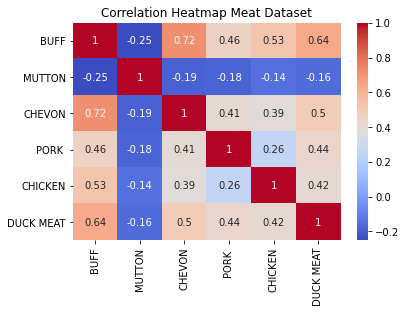

In [67]:
corr=mdf.drop(columns=['TOTAL MEAT']).corr()
sns.heatmap(corr, cmap='coolwarm',annot = True,
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.title('Correlation Heatmap Meat Dataset')

In [0]:
columns_drop=['TOTAL MEAT','TOTAL EGG','LAYING DUCK','LAYING HEN','DUCK MEAT']
me_df=me_df.drop(columns=columns_drop)

## Standarization

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler=StandardScaler()
X=me_df.drop(columns=['DISTRICT'])
scaler.fit(X)
scaled_data=scaler.transform(X)
scaled_data.shape

(75, 7)

## Clustering

### DBSCAN

In [0]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors

In [0]:
neigh= NearestNeighbors(n_neighbors=9)
nbrs= neigh.fit(scaled_data)
distances, indices = nbrs.kneighbors(scaled_data)
distances.shape

(75, 9)

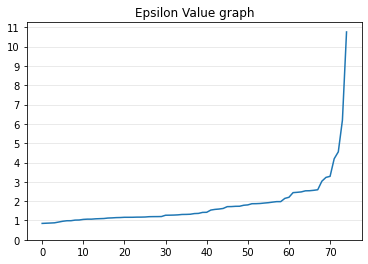

In [0]:
distances =np.sort(distances, axis =0)
distances[0]
distances_=distances[:,8]
plt.plot(distances_)
plt.grid(color='grey', linestyle='-',axis='y',alpha=0.2)
plt.title('Epsilon Value graph')
plt.yticks(np.arange(0,12,1))
plt.show()

In [0]:
min_samples= 8
eps= 2

dbscan=DBSCAN(eps=0.8, min_samples=3)
dbscan.fit(scaled_data)
me_df['DBSCAN Label'] = dbscan.labels_

In [0]:
pd.set_option("Max_rows",100)
me_df.sort_values(by='DBSCAN Label')

,DISTRICT,BUFF,MUTTON,CHEVON,PORK,CHICKEN,HEN EGG,DUCK EGG,DBSCAN Label
37,GORKHA,3147,100,815,197,691,4598,32,-1
25,NUWAKOT,4160,66,700,285,1140,26109,215,-1
26,DHADING,3105,16,314,415,2965,28205,272,-1
27,MAKWANPUR,2795,10,1172,162,2405,58059,47,-1
28,DHANUSHA,2538,2,1566,95,514,8650,295,-1
32,BARA,4076,1,1205,356,945,9955,627,-1
34,CHITWAN,5550,13,1769,598,9810,411901,274,-1
73,KAILALI,5962,71,1480,469,1303,16928,275,-1
40,KASKI,4583,117,839,659,1738,42827,324,-1
41,PARBAT,1231,18,374,212,280,6252,525,-1


In [0]:
str(me_df['DBSCAN Label'].tolist())

'[1, 0, 1, 2, 0, -1, 1, -1, 2, 2, -1, -1, -1, -1, -1, -1, 0, 0, 3, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1, 0, 0, 0, -1, 0, -1, 3, 3, -1, 0, 0, -1, -1, 0, 0, -1, 0, 0, 0, -1, -1, -1, 4, -1, 4, -1, 4, 0, 0, 0, -1, 4, 0, -1, -1, -1, -1, 4, 4, 4, 0, 0, 0, 0, -1, -1]'

## PCA

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=1)
pca =pca.fit(scaled_data)
scaled_transformed=pca.transform(scaled_data)

scaled_transformed_df=pd.DataFrame(scaled_transformed)
scaled_transformed_df.columns=['Feature 1','Feature 2','Feature 3']

colors = ['purple', 'maroon', 'green', 'yellow', 'skyblue', 'deeppink',  'red', 'black']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

In [0]:
plot_data=pd.DataFrame(scaled_transformed, columns=['Feature 1','Feature 2','Feature 3'])
plot_data['Label']=dbscan.labels_
plot_data['DISTRICT'] = me_df['DISTRICT'].tolist()

In [0]:
# eps=0.76
# min_samples=3

# dbscan=DBSCAN(eps=eps,min_samples=min_samples)
# dbscan.fit(scaled_data)
# me_df['DBSCAN Label'] = dbscan.labels_
# print(np.unique(dbscan.labels_))

# colors = ['purple', 'maroon', 'green', 'yellow', 'skyblue', 'deeppink',  'lightcyan', 'black']
# vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
# plt.scatter(scaled_transformed[:,0],scaled_transformed[:,1],c=vectorizer(dbscan.labels_))
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('Clusters generated by DBSCAN with eps={0} and min_samples={1}'.format(eps,min_samples))

In [0]:
import plotly.express as px

In [0]:
fig=px.scatter(plot_data, x= 'Feature 1',y='Feature 2',color='Label',hover_data=['DISTRICT'],width=800, height=600)
fig.update_layout(
    title="Clusters by DBSCAN on Agriculture Dataset",
    xaxis_title="Feature 1",
    yaxis_title="Feature 2",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#7f7f7f"
    )
)
fig.show()

fig=px.scatter_3d(plot_data, x= 'Feature 1',y='Feature 2',z='Feature 3',color='Label',hover_data=['DISTRICT'],width=800, height=600,size_max=10,opacity=0.7)
fig.update_layout(
    title="Clusters 3D Visualization DBSCAN on Agriculture Dataset",
    xaxis_title="Feature 1",
    yaxis_title="Feature 2",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#7f7f7f"
    ),
)
fig.show()

## Visualize the data

In [0]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score,calinski_harabasz_score, davies_bouldin_score

Clstr 	 Error 		 Silho	Calinski 	Davies 
2 	15177658899.64 	 0.95	759.67		0.03
3 	2815574384.88 	 0.77	2177.54		0.26
4 	1734637066.65 	 0.68	2338.34		0.41
5 	913441542.34 	 0.54	3299.23		0.50
6 	615755055.22 	 0.55	3866.13		0.44
7 	328739234.84 	 0.56	5957.08		0.43
8 	257155299.04 	 0.50	6434.11		0.49
9 	221780159.88 	 0.48	6431.72		0.51


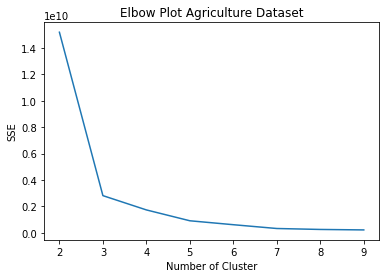

In [0]:
k_values=[]
k_inertia=[]

print('Clstr \t Error \t\t Silho\tCalinski \tDavies ')
for k in range(2,10):
    kmeans=KMeans(n_clusters=k,random_state=1)
    kmeans.fit(X)
    k_values.append(k)
    k_inertia.append(kmeans.inertia_)
#     print(k,': {0:.2f}'.format(kmeans.inertia_))
#     print('Silhouette: {0:.2f}'.format(silhouette_score(X, kmeans.labels_)))
    print(k,'\t{0:.2f} \t {1:.2f}\t{2:.2f}\t\t{3:.2f}'
          .format(kmeans.inertia_,silhouette_score(X, kmeans.labels_),calinski_harabasz_score(X, kmeans.labels_),davies_bouldin_score(X, kmeans.labels_)))
 

plt.title('Elbow Plot Agriculture Dataset')
plt.xlabel('Number of Cluster')
plt.ylabel('SSE')
plt.plot(k_values,k_inertia)

In [0]:
kmeans=KMeans(n_clusters=7,random_state=1)
kmeans.fit(X)
print('Kmeans labelled dataset as:\n',kmeans.labels_)
print('*'*35,'\n')
# print('The center of the clusters are:\n')
# print(kmeans.cluster_centers_)
print('*'*35,'\n')
print('The error: \n')
print(kmeans.inertia_)

Kmeans labelled dataset as:
 [4 0 4 0 0 4 4 4 4 4 6 3 3 3 5 5 0 0 4 0 0 2 2 3 2 3 3 6 0 0 0 0 0 0 1 4 4
 0 0 5 2 0 0 0 4 4 4 0 2 0 0 4 4 4 4 4 4 4 4 4 4 0 0 6 5 5 4 4 4 4 4 4 4 5
 5]
*********************************** 

*********************************** 

The error: 

328739234.8445134


In [0]:

# sns.scatterplot(x=0,y=1,data=pd.DataFrame(scaled_transformed),hue=pd.Series(kmeans.labels_))
# sns.scatterplot(x='Feature 1',y='Feature 2',data=scaled_transformed_df,hue=kmeans.labels_)
# plt.scatter(x='Feature 1',y='Feature 2',data=scaled_transformed_df,c=vectorizer(kmeans.labels_))
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('Clusters generated by KMeans')

scaled_transformed_df['Label']=kmeans.labels_
scaled_transformed_df['DISTRICT'] = me_df['DISTRICT'].tolist()

fig=px.scatter(scaled_transformed_df, x= 'Feature 1',y='Feature 2',color='Label',hover_data=['DISTRICT'],width=900, height=600)
fig.update_layout(
    title="Clusters generated by KMeans on Agriculture Dataset",
    xaxis_title="Feature 1",
    yaxis_title="Feature 2",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#7f7f7f"
    )
)
fig.show()

fig=px.scatter_3d(scaled_transformed_df, x= 'Feature 1',y='Feature 2',z='Feature 3',color='Label',hover_data=['DISTRICT'],width=900, height=600,size_max=10,opacity=0.7)
fig.update_layout(
    title="Clusters 3D Visualization by KMeans on Agriculture Dataset ",
    xaxis_title="Feature 1",
    yaxis_title="Feature 2",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#7f7f7f"
    )
)
fig.show()

Dimension reduction lead to weird look in cluster

silhouthee score in k means

**Gaussian Mixture**

In [0]:
from sklearn.mixture import GaussianMixture

In [0]:
gmm=GaussianMixture(n_components=7)
gmm.fit(scaled_transformed)
cluster_labels=gmm.predict(scaled_transformed)
print('Weights:\t\t\t',gmm.weights_)
print('Mean:\t\t\t\t',gmm.means_.shape)
print('Convergence reached:\t\t',gmm.converged_)
print('Covariance of each mixture:\t',gmm.covariances_.shape)
print('No of step used by best fit of EM\n to reach the convergence :\t',gmm.n_iter_)
print('Lower bound value on the log-likelihood\n of the best fit of EM:\t\t',gmm.lower_bound_)


Weights:			 [0.47033964 0.03999991 0.01333333 0.16308208 0.12553132 0.01333333
 0.17438038]
Mean:				 (7, 3)
Convergence reached:		 True
Covariance of each mixture:	 (7, 3, 3)
No of step used by best fit of EM
 to reach the convergence :	 17
Lower bound value on the log-likelihood
 of the best fit of EM:		 -1.5820456501443536


In [0]:
scaled_transformed_df['GMM Label']=cluster_labels
cluster_labels

array([0, 0, 0, 6, 6, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 6, 0, 0, 0, 0, 6, 3,
       6, 6, 6, 3, 6, 6, 0, 6, 6, 0, 0, 6, 2, 0, 0, 4, 0, 6, 1, 0, 0, 0,
       0, 0, 0, 6, 3, 3, 3, 4, 4, 4, 5, 4, 0, 0, 0, 0, 4, 0, 0, 1, 3, 0,
       4, 4, 4, 0, 0, 0, 0, 1, 3])

In [0]:
fig=px.scatter(scaled_transformed_df, x= 'Feature 1',y='Feature 2',color='GMM Label',hover_data=['DISTRICT'],width=900, height=450)
fig.update_layout(
    title="Clusters generated by GMM",
    xaxis_title="Feature 1",
    yaxis_title="Feature 2",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#7f7f7f"
    )
)
fig.show()

fig=px.scatter_3d(scaled_transformed_df, x= 'Feature 1',y='Feature 2',z='Feature 3',color='GMM Label',hover_data=['DISTRICT'],width=900, height=600,size_max=7,opacity=0.7)
fig.update_layout(
    title="Clusters 3D Visualization by GMM on Agriculture Dataset",
    xaxis_title="Feature 1",
    yaxis_title="Feature 2",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#7f7f7f"
    )
)
fig.show()

In [0]:
scaled_transformed_df

,Feature 1,Feature 2,Feature 3,Label,DISTRICT,GMM Label
0,-1.184252,0.041872,-0.400079,4,TAPLEJUNG,0
1,-0.372077,-0.212818,0.105649,0,SANKHUWASHAVA,0
2,-1.074595,-0.006867,-0.454869,4,SOLUKHUMBU,0
3,-0.047821,-0.596819,-0.695661,0,PANCHTHAR,6
4,-0.326281,-0.434229,-0.830870,0,ILLAM,6
5,-0.595015,-0.264737,-0.422585,4,TERHATHUM,0
6,-0.603083,-0.221928,-0.976288,4,DHANKUTA,0
7,-0.537955,-0.289266,0.206807,4,BHOJPUR,0
8,-0.394226,-0.269731,-0.232399,4,KHOTANG,0
9,-0.327111,-0.374005,-0.164281,4,OKHALDHUNGA,0
